In [17]:
# can use jupyter notebook
# or can use python -m notebook

# Link to schema: https://www.airroi.com/data-portal/markets/detroit-united-states
# Link to Jupyter Notebook Shortcuts: https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330/

import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind
from scipy.stats import bootstrap

pd.set_option('display.max_columns', None)

df = pl.read_parquet("../data/airroi_listings.parquet")
print(df.shape)
df.head(3)

(270, 61)


listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
i64,str,str,str,str,i32,i64,str,str,str,bool,f64,f64,i32,i32,i32,f64,bool,str,bool,i32,str,str,i32,i32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64
10837,"""Famous DLY Gue…","""Entire home""","""entire_home""","""https://a0.mus…",41,39040,"""Nathan""","""""","""""",true,42.3786,-83.085,16,4,12,2.0,false,"""TV,Wifi,Air co…",false,1,"""Strict""","""USD""",100,0,499,4.78,4.7,4.9,4.7,5.0,4.3,4.7,40457.0,40457.0,222.2,222.2,0.5,0.0,110.8,110.8,0.0,0.0,174,0,191,365,16045.0,16045.0,263.5,263.5,0.7,0.0,178.3,178.3,0.0,0.0,60,0,30,90
259518,"""Design-centric…","""Entire rental …","""entire_home""","""https://a0.mus…",12,196727,"""Meghan""","""270516330""","""Lindsey""",true,42.3311,-83.0761,4,2,2,2.0,false,"""Wifi,Air condi…",false,1,"""Strict""","""USD""",100,0,475,4.89,4.9,5.0,4.9,4.9,4.9,4.7,37665.0,37665.0,185.5,185.5,0.5,0.0,103.2,103.2,0.0,0.0,194,0,171,365,13802.0,13802.0,243.5,243.5,0.6,0.0,153.4,153.4,0.0,0.0,53,0,37,90
491801,"""Old Farmhouse …","""Private room i…","""private_room""","""https://a0.mus…",24,2430640,"""Julie""","""""","""""",true,42.415,-82.9133,null,null,2,0.0,false,"""Children’s boo…",false,1,"""Flexible""","""USD""",20,10,143,4.86,4.8,4.9,4.7,4.9,4.6,4.8,2232.0,2232.0,52.1,52.1,0.1,0.1,6.1,6.1,7.8,7.8,41,77,324,365,585.0,585.0,58.1,58.1,0.1,0.1,6.5,6.5,9.0,9.0,9,25,81,90


In [2]:
df[['photos_count', 'guests', 'bedrooms', 'beds', 'baths', 'num_reviews', 'rating_overall', 'ttm_revenue', 'l90d_revenue']] .describe()

describe,photos_count,guests,bedrooms,beds,baths,num_reviews,rating_overall,ttm_revenue,l90d_revenue
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0
"""null_count""",0.0,61.0,74.0,0.0,0.0,0.0,2.0,0.0,0.0
"""mean""",23.42963,5.30622,2.204082,2.525926,1.168519,187.003704,4.775709,19567.777778,5711.281481
"""std""",14.165533,3.679727,1.380889,2.120285,0.953535,205.324107,0.197349,21727.966292,5947.997051
"""min""",2.0,1.0,1.0,1.0,0.0,1.0,3.69,336.0,0.0
"""max""",89.0,16.0,7.0,12.0,4.5,1182.0,5.0,177212.0,45298.0
"""median""",21.0,4.0,2.0,2.0,1.0,121.0,4.82,14748.0,4141.5
"""25%""",14.0,2.0,1.0,1.0,1.0,39.0,4.71,4437.0,1165.0
"""75%""",29.0,6.0,3.0,3.0,1.5,251.0,4.91,28641.0,8792.0


In [3]:
print(df.select("ttm_revenue").sample(n=5, seed=0).mean().item())
print(df.select("ttm_revenue").sample(n=50, seed=0).mean().item())
print(df.select("ttm_revenue").sample(n=100, seed=0).mean().item())
print(df.select("ttm_revenue").sample(n=200, seed=0).mean().item())
print(df.select("ttm_revenue").mean().item())

32735.4
21144.28
20041.29
17862.015
19567.777777777777


## Basic Correlation Analysis

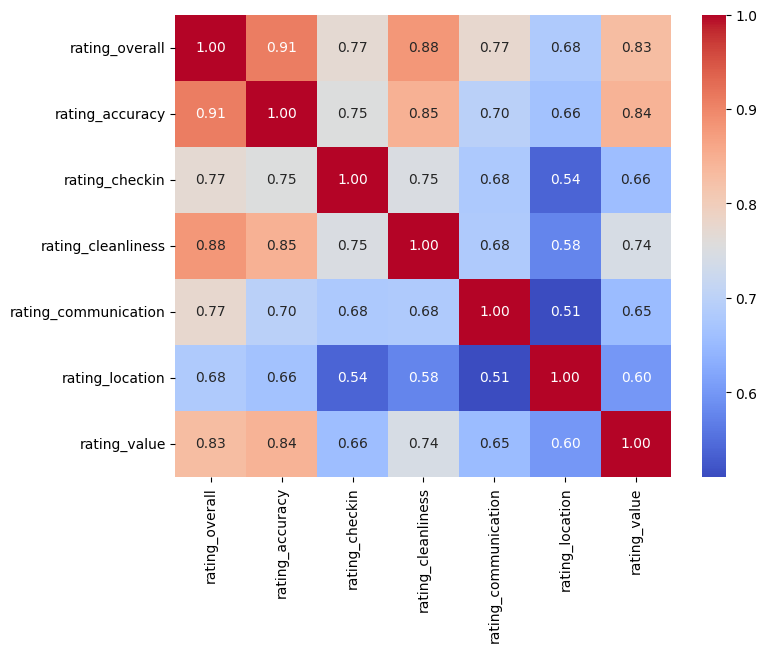

In [4]:
ratings_df = df.select(pl.col("^rating.*$"))
corr_matrix = ratings_df.to_pandas().corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

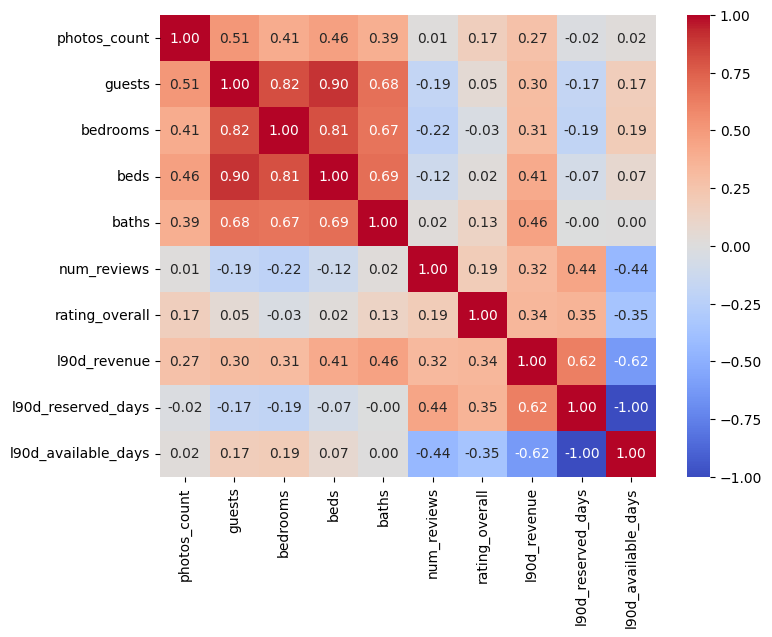

In [5]:
df2 = df.select(pl.col(['photos_count', 'guests', 'bedrooms', 'beds', 'baths',
                         'num_reviews', 'rating_overall', 'l90d_revenue',
                       'l90d_reserved_days', 'l90d_available_days']))

corr_matrix2 = df2.to_pandas().corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## How does Revenue (last 90 days) compare w/ # of Baths

shape: (9, 9)
┌───────┬───────┬─────────────┬─────────┬───┬─────────┬─────────────┬─────────┬─────────┐
│ baths ┆ count ┆ mean        ┆ median  ┆ … ┆ max     ┆ std_dev     ┆ q1      ┆ q3      │
│ ---   ┆ ---   ┆ ---         ┆ ---     ┆   ┆ ---     ┆ ---         ┆ ---     ┆ ---     │
│ f64   ┆ u32   ┆ f64         ┆ f64     ┆   ┆ f64     ┆ f64         ┆ f64     ┆ f64     │
╞═══════╪═══════╪═════════════╪═════════╪═══╪═════════╪═════════════╪═════════╪═════════╡
│ 0.0   ┆ 57    ┆ 1708.45614  ┆ 1076.0  ┆ … ┆ 8424.0  ┆ 1646.858916 ┆ 409.0   ┆ 2669.0  │
│ 1.0   ┆ 141   ┆ 5670.276596 ┆ 5395.0  ┆ … ┆ 18908.0 ┆ 4249.798184 ┆ 1724.0  ┆ 8820.0  │
│ 1.5   ┆ 16    ┆ 6348.0625   ┆ 4416.0  ┆ … ┆ 17108.0 ┆ 5748.369177 ┆ 2065.0  ┆ 13395.0 │
│ 2.0   ┆ 23    ┆ 7591.391304 ┆ 7362.0  ┆ … ┆ 20232.0 ┆ 6238.039077 ┆ 1421.0  ┆ 12883.0 │
│ 2.5   ┆ 12    ┆ 6593.916667 ┆ 6252.0  ┆ … ┆ 14045.0 ┆ 4955.484647 ┆ 3561.0  ┆ 11254.0 │
│ 3.0   ┆ 8     ┆ 17980.875   ┆ 17243.0 ┆ … ┆ 29159.0 ┆ 7921.53496  ┆ 13574.0 ┆ 26205.

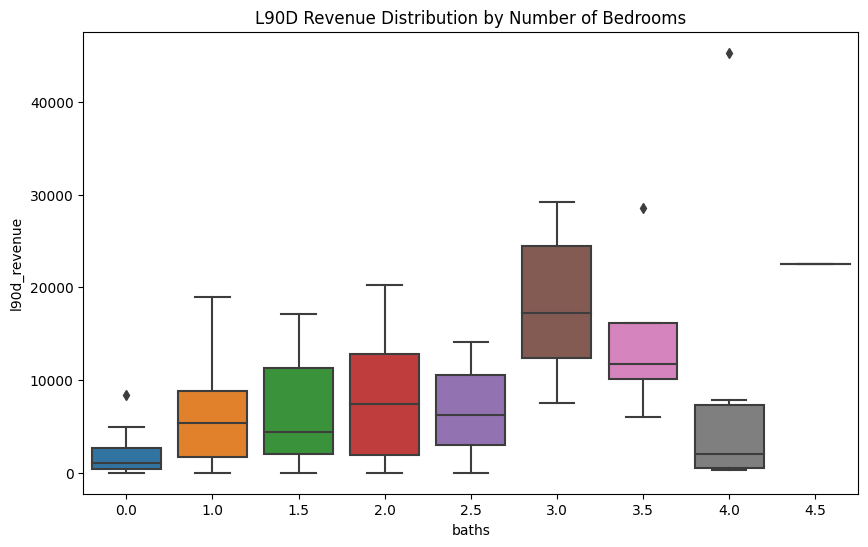

In [6]:
df_bath = df.select(["baths", "l90d_revenue"]).drop_nulls()
pdf = df_bath.to_pandas()

summary_table = (
    df_bath
    .groupby("baths")
    .agg([
        pl.col("l90d_revenue").count().alias("count"),
        pl.col("l90d_revenue").mean().alias("mean"),
        pl.col("l90d_revenue").median().alias("median"),
        pl.col("l90d_revenue").min().alias("min"),
        pl.col("l90d_revenue").max().alias("max"),
        pl.col("l90d_revenue").std().alias("std_dev"),
        pl.col("l90d_revenue").quantile(0.25).alias("q1"),
        pl.col("l90d_revenue").quantile(0.75).alias("q3")
    ])
    .sort("baths")
)

print(summary_table)

plt.figure(figsize=(10,6))
sns.boxplot(data=pdf, x="baths", y="l90d_revenue")
plt.title("L90D Revenue Distribution by Number of Bedrooms")
plt.show()

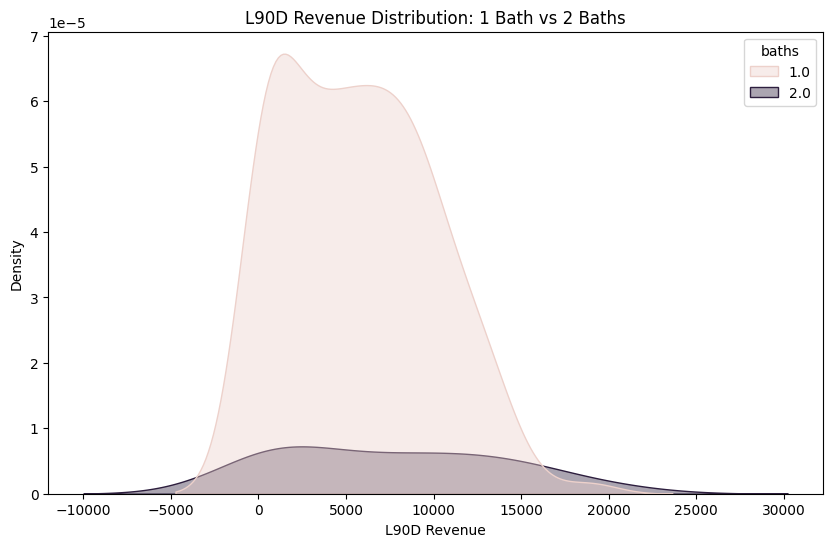

In [7]:
subset = pdf[pdf["baths"].isin([1, 2])]  # filter to 1 & 2 baths

plt.figure(figsize=(10,6))
sns.kdeplot(data=subset, x="l90d_revenue", hue="baths", fill=True, alpha=0.4)
plt.title("L90D Revenue Distribution: 1 Bath vs 2 Baths")
plt.xlabel("L90D Revenue")
plt.show()

In [8]:
# Null hypothesis (H₀):
# The mean L90D revenue for 1-bath and 2-bath properties is the same.

# Alternative hypothesis (H₁):
# The means are different.

# p-value = 0.1666

# This is greater than the common α = 0.05 threshold.

# Therefore, you fail to reject the null hypothesis.

# Meaning: Based on the sample you have, you do not have statistically significant evidence that revenue differs between 1-bath and 2-bath listings.

rev_1 = subset[subset["baths"] == 1]["l90d_revenue"]
rev_2 = subset[subset["baths"] == 2]["l90d_revenue"]

stat, p = ttest_ind(rev_1, rev_2, equal_var=False) # Welch’s t-test recommended
print(f"T-test → statistic={stat}, p-value={p}")

T-test → statistic=-1.4240382843041681, p-value=0.16658911857490044


In [9]:
mean_diff = rev_1.mean() - rev_2.mean()
pooled_std = np.sqrt(((rev_1.std()**2) + (rev_2.std()**2)) / 2)
cohens_d = mean_diff / pooled_std

print(f"Cohen's d effect size: {cohens_d:.3f}")

Cohen's d effect size: -0.360


## Superhost vs Regular Host

In [10]:
print(df["superhost"].value_counts())


df.groupby("superhost").agg([
    pl.col("ttm_revenue").mean().round(2).alias("avg_revenue"),
    pl.col("rating_overall").mean().round(2).alias("avg_rating")
])

shape: (2, 2)
┌───────────┬────────┐
│ superhost ┆ counts │
│ ---       ┆ ---    │
│ bool      ┆ u32    │
╞═══════════╪════════╡
│ true      ┆ 148    │
│ false     ┆ 122    │
└───────────┴────────┘


superhost,avg_revenue,avg_rating
bool,f64,f64
true,27094.41,4.86
false,10437.11,4.67


In [12]:
# This was using independent t-test
# Traditional tests (like the T-test) assume your data follows a perfect bell curve (Not the best move here)
metrics = ["ttm_revenue", "rating_overall"]

group1_data = df.filter(pl.col("superhost") == True)
group2_data = df.filter(pl.col("superhost") == False)

for metric in metrics:
    # Extract data and clean nulls
    data1 = group1_data.get_column(metric).drop_nulls()
    data2 = group2_data.get_column(metric).drop_nulls()
    
    m1, m2 = data1.mean(), data2.mean()
    
    # Perform T-test (Welch's)
    t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
    
    # Output results
    print(f"{metric:<18} | {m1:>12.2f} | {m2:>12.2f} | {t_stat:>10.3f} | {p_val:>10.2e}")

ttm_revenue        |     27094.41 |     10437.11 |      7.225 |   8.98e-12
rating_overall     |         4.86 |         4.67 |      8.606 |   8.57e-15


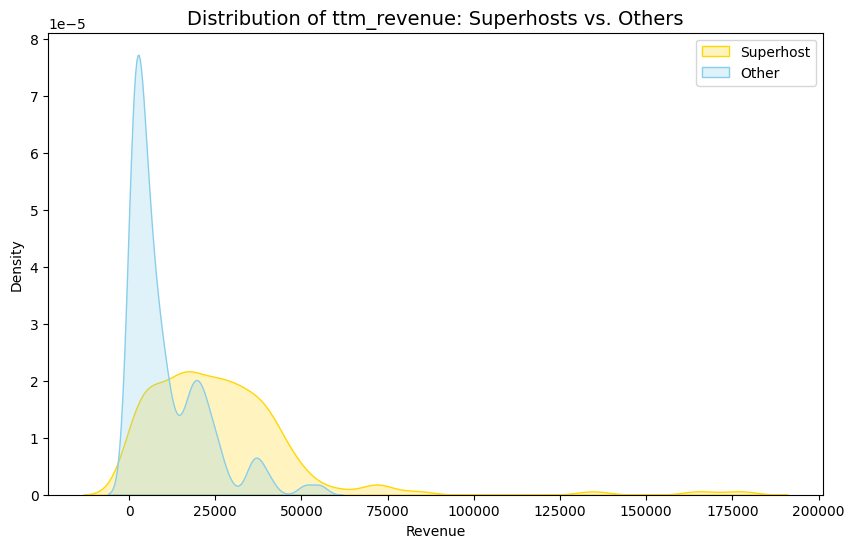

In [13]:
# Prepare data
metric = "ttm_revenue"
data1 = group1_data.get_column(metric).drop_nulls()  # Superhosts
data2 = group2_data.get_column(metric).drop_nulls()  # Others

# Set up the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data1, label="Superhost", fill=True, color="gold", bw_adjust=0.5)
sns.kdeplot(data2, label="Other", fill=True, color="skyblue", bw_adjust=0.5)

# Style the plot
plt.title(f"Distribution of {metric}: Superhosts vs. Others", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

In [14]:
# 1. T-test (for differences in Means)
t_stat, p_val_t = ttest_ind(data1, data2, equal_var=False)

# 2. Mann-Whitney U (for differences in Distribution/Rank)
u_stat, p_val_u = mannwhitneyu(data1, data2, alternative='two-sided')

print(f"{'TEST TYPE':<20} | {'STATISTIC':>12} | {'P-VALUE':>12}")
print("-" * 50)
print(f"{'Welch T-Test':<20} | {t_stat:>12.3f} | {p_val_t:>12.2e}")
print(f"{'Mann-Whitney U':<20} | {u_stat:>12.3f} | {p_val_u:>12.2e}")

# From Gemini
# Interpretation: The Mann-Whitney U test compares the entire distribution and ranks of the data, 
# rather than just the average. This is usually more appropriate for data like ratings that are 
# bounded between 0 and 5 and heavily skewed. 
# The P-value of \(7.81\times 10^{-17}\) is even smaller than the T-test's p-value. 
# This indicates that a randomly selected Superhost listing is very likely to have a higher rating 
# than a randomly selected non-Superhost listing.The large U-statistic is simply the internal calculation 
# used by the test to arrive at the p-value.

TEST TYPE            |    STATISTIC |      P-VALUE
--------------------------------------------------
Welch T-Test         |        7.225 |     8.98e-12
Mann-Whitney U       |    14034.000 |     4.55e-15


## Bootstrapping Last 90 days revenue calculation

In [26]:
# 1. Properly extract the median as a single number (float)
median_val = df.select(pl.col("l90d_revenue").median()).item()

# 2. Prepare data for bootstrap (ensure it's a 1D numpy array in a tuple)
data = (df.get_column("l90d_revenue").drop_nulls().to_numpy(), )

# 3. Define the statistic function (ensure it uses the axis parameter)
def p50_statistic(x, axis):
    return np.percentile(x, 50, axis=axis)

# 4. Run the bootstrap for the 50th percentile (Median)
res = bootstrap(data, 
                p50_statistic, 
                n_resamples=999, 
                confidence_level=0.95, 
                method='BCa')

# 5. View clean results
print(f"50th Percentile (Observed): {median_val:.2f}")
print(f"95% Confidence Interval: ({res.confidence_interval.low:.2f}, {res.confidence_interval.high:.2f})")
print(f"Standard Error: {res.standard_error:.4f}")

50th Percentile (Observed): 4141.50
95% Confidence Interval: (3273.00, 5044.00)
Standard Error: 519.7508


In [20]:
df.select(pl.col("l90d_revenue").median())

l90d_revenue
f64
4141.5


In [15]:
df.head(2)

listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,superhost,latitude,longitude,guests,bedrooms,beds,baths,registration,amenities,instant_book,min_nights,cancellation_policy,currency,cleaning_fee,extra_guest_fee,num_reviews,rating_overall,rating_accuracy,rating_checkin,rating_cleanliness,rating_communication,rating_location,rating_value,ttm_revenue,ttm_revenue_native,ttm_avg_rate,ttm_avg_rate_native,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,ttm_revpar_native,ttm_adjusted_revpar,ttm_adjusted_revpar_native,ttm_reserved_days,ttm_blocked_days,ttm_available_days,ttm_total_days,l90d_revenue,l90d_revenue_native,l90d_avg_rate,l90d_avg_rate_native,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
i64,str,str,str,str,i32,i64,str,str,str,bool,f64,f64,i32,i32,i32,f64,bool,str,bool,i32,str,str,i32,i32,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64
10837,"""Famous DLY Gue…","""Entire home""","""entire_home""","""https://a0.mus…",41,39040,"""Nathan""","""""","""""",true,42.3786,-83.085,16,4,12,2.0,false,"""TV,Wifi,Air co…",false,1,"""Strict""","""USD""",100,0,499,4.78,4.7,4.9,4.7,5.0,4.3,4.7,40457.0,40457.0,222.2,222.2,0.5,0.0,110.8,110.8,0.0,0.0,174,0,191,365,16045.0,16045.0,263.5,263.5,0.7,0.0,178.3,178.3,0.0,0.0,60,0,30,90
259518,"""Design-centric…","""Entire rental …","""entire_home""","""https://a0.mus…",12,196727,"""Meghan""","""270516330""","""Lindsey""",true,42.3311,-83.0761,4,2,2,2.0,false,"""Wifi,Air condi…",false,1,"""Strict""","""USD""",100,0,475,4.89,4.9,5.0,4.9,4.9,4.9,4.7,37665.0,37665.0,185.5,185.5,0.5,0.0,103.2,103.2,0.0,0.0,194,0,171,365,13802.0,13802.0,243.5,243.5,0.6,0.0,153.4,153.4,0.0,0.0,53,0,37,90
